In [1]:
%matplotlib inline

In [2]:
import os, sys
home_path = '/home/ubuntu'
data_root = '/home/ubuntu/data/dogscatsrdx/'
results_root = '/home/ubuntu/nbs/lesson1-results/'
sample_root = data_root + 'sample/'
work_path = data_root

In [3]:
from __future__ import division,print_function

In [4]:
from glob import glob
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

In [5]:
import utils; reload(utils)
from utils import *

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [6]:
batch_size=64

In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16
vgg = Vgg16()

In [ ]:
# Move everything to one cell to be able to rerun it all.
no_epochs = 3
batches = vgg.get_batches(work_path+"train", batch_size=batch_size)
validation_batches = vgg.get_batches(work_path+"valid", batch_size=batch_size)
vgg.finetune(batches)
for epoch in range(no_epochs):
  vgg.fit(batches,validation_batches,nb_epoch=1)
  latest_weights_filename = "ft_ep%d.h5" % epoch
  vgg.model.save_weights(results_root+latest_weights_filename)
print("Finished %d fit operations" % no_epochs)
  

In [ ]:
test_path = work_path+"test/"
print(test_path)
batches, preds = vgg.test(test_path, batch_size=batch_size * 2)

In [ ]:
filenames = batches.filenames

print(preds[:5])
print(filenames[:5])

In [ ]:
from PIL import Image
Image.open(test_path + filenames[3])

In [ ]:
save_array(results_root+'filenames.dat', filenames)
save_array(results_root+'preds.dat', preds)

In [8]:
# Load existing data
latest_weights_filename = 'ft_ep2.h5'
# Load the weights of the latest model to calculate
# the predictions on the validation set. Doing so here
# means we don't have to rerun the whole thing.
vgg.model.load_weights(results_root+latest_weights_filename)
val_batches, probs = vgg.test(work_path+'valid', batch_size = batch_size)
filenames = val_batches.filenames
expected_labels = val_batches.classes
our_preds = probs[:,0]
our_labels = np.round(1-our_preds)

Found 3000 images belonging to 2 classes.


Number of correct labels: 2954
[ 979  876 2196 1677]
Called with indices: [ 979  876 2196 1677]
/home/ubuntu/data/dogscatsrdx/valid/cats/cat.8024.jpg


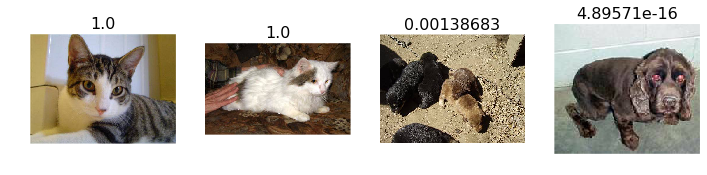

In [9]:
from keras.preprocessing import image
validation_path = work_path + 'valid/'
def plot_validation_imgs(indices, titles = None):
    print("Called with indices: %s" % indices)
    print(validation_path + filenames[indices[0]])
    plots([image.load_img(validation_path + filenames[i]) for i in indices], titles = titles)

# Number of images to show for each sample.
n_view = 4;

correct = np.where(our_labels == expected_labels)[0]
print('Number of correct labels: %d' % len(correct))
correct_indices = permutation(correct)[:n_view]
plot_validation_imgs(correct_indices, our_preds[correct_indices])

Number of incorrect labels: 46
Called with indices: [2077  420 1716 2585]
/home/ubuntu/data/dogscatsrdx/valid/dogs/dog.6199.jpg


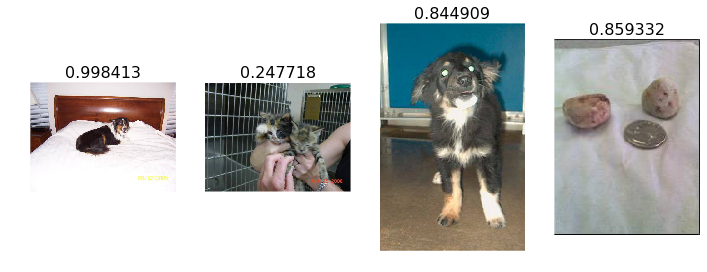

In [10]:
incorrect = np.where(our_labels != expected_labels)[0]
print('Number of incorrect labels: %d' % len(incorrect))
incorrect_indices = permutation(incorrect)[:n_view]
plot_validation_imgs(incorrect_indices, our_preds[incorrect_indices])

Confused indices: [1242 2930 1021 1502]
Called with indices: [1242 2930 1021 1502]
/home/ubuntu/data/dogscatsrdx/valid/cats/cat.4338.jpg


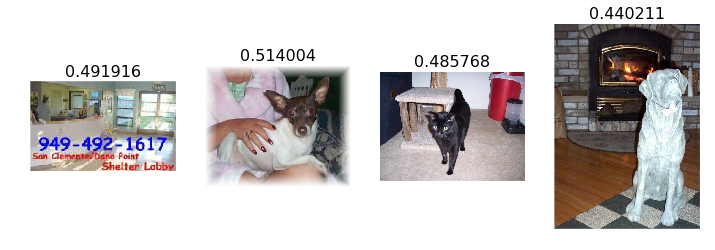

In [11]:
confused = np.argsort(abs(our_preds - 0.5))
confused_indices = confused[:n_view]
print('Confused indices: %s' % confused_indices)
plot_validation_imgs(confused_indices, our_preds[confused_indices])

In [23]:
correct_dogs = np.where((our_labels == 1) & (our_labels == expected_labels))[0]
print('Number of correctly identified dogs: %d' % len(correct_dogs))
if len(correct_dogs):
    most_correct_dogs = np.argsort(our_preds[correct_dogs])[:n_view]
    plot_validation_imgs(correct_dogs[most_correct_dogs], our_preds[correct_dogs][most_correct_dogs])

Number of correctly identified dogs: 1475
[[  6.7572e-08   1.0000e+00]
 [  5.3766e-09   1.0000e+00]
 [  4.4021e-01   5.5979e-01]
 [  4.9597e-15   1.0000e+00]]
Called with indices: [2016 1903 2364 2787]
/home/ubuntu/data/dogscatsrdx/valid/unknown/6765.jpg


IOError: [Errno 2] No such file or directory: '/home/ubuntu/data/dogscatsrdx/valid/unknown/6765.jpg'

In [22]:
correct_cats = np.where((our_labels == 0) & (our_labels == expected_labels))[0]
print('Number of correctly identified cats: %d' % len(correct_cats))
if len(correct_cats):
    most_correct_cats = np.argsort(our_preds[correct_cats])[:n_view]
    plot_validation_imgs(correct_cats[most_correct_dogs], our_preds[correct_cats][most_correct_dogs])

Number of correctly identified cats: 1479
[[  1.0000e+00   1.3604e-17]
 [  1.0000e+00   3.3332e-08]
 [  1.0000e+00   3.5537e-15]
 [  1.0000e+00   7.7456e-13]]
Called with indices: [ 516  401  864 1289]
/home/ubuntu/data/dogscatsrdx/valid/unknown/6543.jpg


IOError: [Errno 2] No such file or directory: '/home/ubuntu/data/dogscatsrdx/valid/unknown/6543.jpg'

Number of erroneous cats: 25
Called with indices: [2930 2293 2544 2423]
/home/ubuntu/data/dogscatsrdx/valid/dogs/dog.10579.jpg


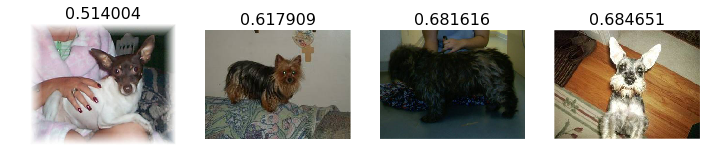

In [14]:
overconfident_cats = np.where((our_labels == 0) & (our_labels != expected_labels))[0]
print('Number of erroneous cats: %d' % len(overconfident_cats))
if len(overconfident_cats):
    most_overconfident_cats = np.argsort(our_preds[overconfident_cats])[:n_view]
    plot_validation_imgs(overconfident_cats[most_overconfident_cats],
                         our_preds[overconfident_cats][most_overconfident_cats])

Number of erroneous dogs: 21
Called with indices: [1213 1211    6  793]
/home/ubuntu/data/dogscatsrdx/valid/cats/cat.7968.jpg


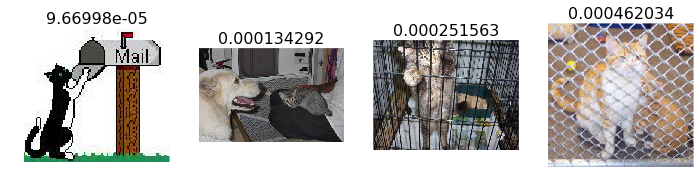

In [15]:
overconfident_dogs = np.where((our_labels == 1) & (our_labels != expected_labels))[0]
print('Number of erroneous dogs: %d' % len(overconfident_dogs))
if len(overconfident_dogs):
    most_overconfident_dogs = np.argsort(our_preds[overconfident_dogs])[:n_view]
    plot_validation_imgs(overconfident_dogs[most_overconfident_dogs],
                         our_preds[overconfident_dogs][most_overconfident_dogs])

[[1479   21]
 [  25 1475]]
{'cats': 0, 'dogs': 1}


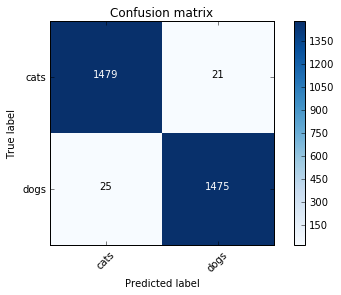

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)
plot_confusion_matrix(cm, val_batches.class_indices)
print(val_batches.class_indices)

In [37]:
# Prepare for Kaggle submission
preds = load_array(results_root+'preds.dat')
filenames = load_array(results_root+'filenames.dat')

isDog=preds[:,1]

# Clip the result to 0.05-0.95 because we are cheaters who cheat.
isDog = isDog.clip(min=0.05, max=0.95)
print(isDog[:5])

# Get the numbers from the filenames
print(filenames[0])
ids = [int(f[8:][:-4]) for f in filenames]
print(ids[:5])
combo = np.stack([ids,isDog],axis=1)
print(combo[:5])
submission_path = results_root+'submission.txt'
np.savetxt(submission_path,combo,fmt='%d,%.5f',header='id,label',comments='')

[ 0.05    0.0765  0.05    0.05    0.95  ]
unknown/9292.jpg
[9292, 12026, 9688, 4392, 779]
[[  9.2920e+03   5.0000e-02]
 [  1.2026e+04   7.6499e-02]
 [  9.6880e+03   5.0000e-02]
 [  4.3920e+03   5.0000e-02]
 [  7.7900e+02   9.5000e-01]]
